# Import libraries
___

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import glob
import os

# Import dataframes
___

In [2]:
def read_csv(directory):
    path = directory
    all_files = glob.glob(os.path.join(path, '*.csv'))

    l = []

    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        l.append(df)

    df = pd.concat(l, axis=0, ignore_index=True)
    
    return df

In [3]:
climate_df = read_csv('Climate_data')
carbon_df = read_csv('CO2_data')

# Data preparation
___

In [4]:
climate_df['DATE'] = pd.to_datetime(climate_df['DATE'])

In [5]:
columns = {'DATE':'Date',
           'ADPT':'Average Dew Point Temperature', 
           'AWND':'Average Wind Speed',
           'PRCP':'Total Monthly Precipitation',
           'PSUN':'Monthly Average of the daily percents of possible sunshine',
           'TAVG':'Average Monthly Temperature',
           'TMAX':'Monthly Maximum Temperature',
           'TMIN':'Monthly Minimum Temperature',
           'RHAV':'Relative Humidity'}

climate_df = climate_df.rename(columns=columns)

In [6]:
cols = ['Date',
        'Average Dew Point Temperature',
        'Average Wind Speed',
        'Total Monthly Precipitation',
        'Monthly Average of the daily percents of possible sunshine',
        'Average Monthly Temperature',
        'Monthly Maximum Temperature',
        'Monthly Minimum Temperature',
        'Relative Humidity']

def create_df(name, column_names, dataframe, site='NAME'):
    df = dataframe[dataframe[site] == name]
    df = df[column_names]
    return df.set_index('Date')

### Climate data
___

In [7]:
bou = create_df('BOULDER, CO US', cols, climate_df)
hil = create_df('HILO INTERNATIONAL AIRPORT 87, HI US', cols, climate_df)
hoh = create_df('HOHENPEISSENBERG, GM', cols, climate_df)
cap = create_df('CAPE FLORIDA, FL US', cols, climate_df)
los = create_df('LOS ANGELES DOWNTOWN USC, CA US', cols, climate_df)
san = create_df('SAN FRANCISCO DOWNTOWN, CA US', cols, climate_df)
ice = create_df('VESTMANNAEYJAR, IC', cols, climate_df)
tem = create_df('TEMPLE DRAUGHTON MIL, TX US', cols, climate_df)

bou = Boulder, CO
<br>hil = Hilo International, HI
<br>hoh = Hohenpeissenberg, GM
<br>cap = Cape Florida, FL
<br>los = Los Angeles, CA
<br>san = San Francisco, CA
<br>ice = Vestmannaeyjar, IC
<br>tem = Temple, TX

### Carbon emission data
___

In [8]:
carbon_df[['year', 'month']] = carbon_df[['year', 'month']].astype(str)
carbon_df['Date'] = carbon_df[['year', 'month']].agg(''.join, axis=1)
carbon_df['Date'] = carbon_df['Date'].astype(int)
carbon_df['Date'] = pd.to_datetime(carbon_df['Date'], format='%Y%m')

In [9]:
cols_co2 = ['Date', 'site_code', 'latitude', 'longitude', 'value',]

bou_co2 = create_df('BAO', cols_co2, carbon_df, site='site_code')
hil_co2 = create_df('MLO', cols_co2, carbon_df, site='site_code')
hoh_co2 = create_df('HPB', cols_co2, carbon_df, site='site_code')
cap_co2 = create_df('KEY', cols_co2, carbon_df, site='site_code')
los_co2 = create_df('MWO', cols_co2, carbon_df, site='site_code')
san_co2 = create_df('STR', cols_co2, carbon_df, site='site_code')
ice_co2 = create_df('ICE', cols_co2, carbon_df, site='site_code')
tem_co2 = create_df('WKT', cols_co2, carbon_df, site='site_code')

WKT - Moody, TX
<br>MLO - Mauna Loa, HI

# Data analysis/visualization
___

In [10]:
def plot(y_value, df, x_value='Date', bin_num=100):    
    median = df[y_value].median()
    
    sns.set(rc={'figure.figsize':(10,10)})
    sns.set_style('white')
    
    fig, axs = plt.subplots(2, 1, figsize=(15, 10), dpi=100)
    sns.scatterplot(data=df, x=x_value, y=y_value, ax=axs[0])
    sns.histplot(data=df[y_value], kde=True, bins=bin_num, ax=axs[1])
    axs[1].axvline(median, color='r')
    plt.tight_layout()

In [11]:
def outlier(df, column='value'):
    
    median = df[column].median()
    df.loc[df['value'] < 0, 'value'] = median
    
    std = df[column].std()
    outliers = (df[column] - median).abs() > 3*std

    df.loc[outliers] = np.nan
    df[column].fillna(median, inplace=True)
    
    return df

In [12]:
def Z_score(df):
    # get a sample of data from dataframe
    df_sample = df.sample(frac=0.5)
    
    # calculate the mean of that sample
    x = np.log(df_sample).mean()
    
    # calculate the mean of the whole dataframe
    mu = np.log(df).mean()
    
    # number of samples
    n = len(df)/2
    
    # calculate the standard deviation of the whole dataframe
    sigma = np.log(df).std()
    
    # translate the z-score formula into code
    Z = abs(x - mu)/ (sigma/np.sqrt(n))
    return Z

In [13]:
cols_ = ['Average Dew Point Temperature',
        'Average Wind Speed',
        'Total Monthly Precipitation',
        'Monthly Average of the daily percents of possible sunshine',
        'Average Monthly Temperature',
        'Monthly Maximum Temperature',
        'Monthly Minimum Temperature',
        'Relative Humidity']

def plot_climate(df):
    for col in cols_:
        if len(df[col]) != df[col].isna().sum():
            plot(col, df)

### Climate data analysis
___

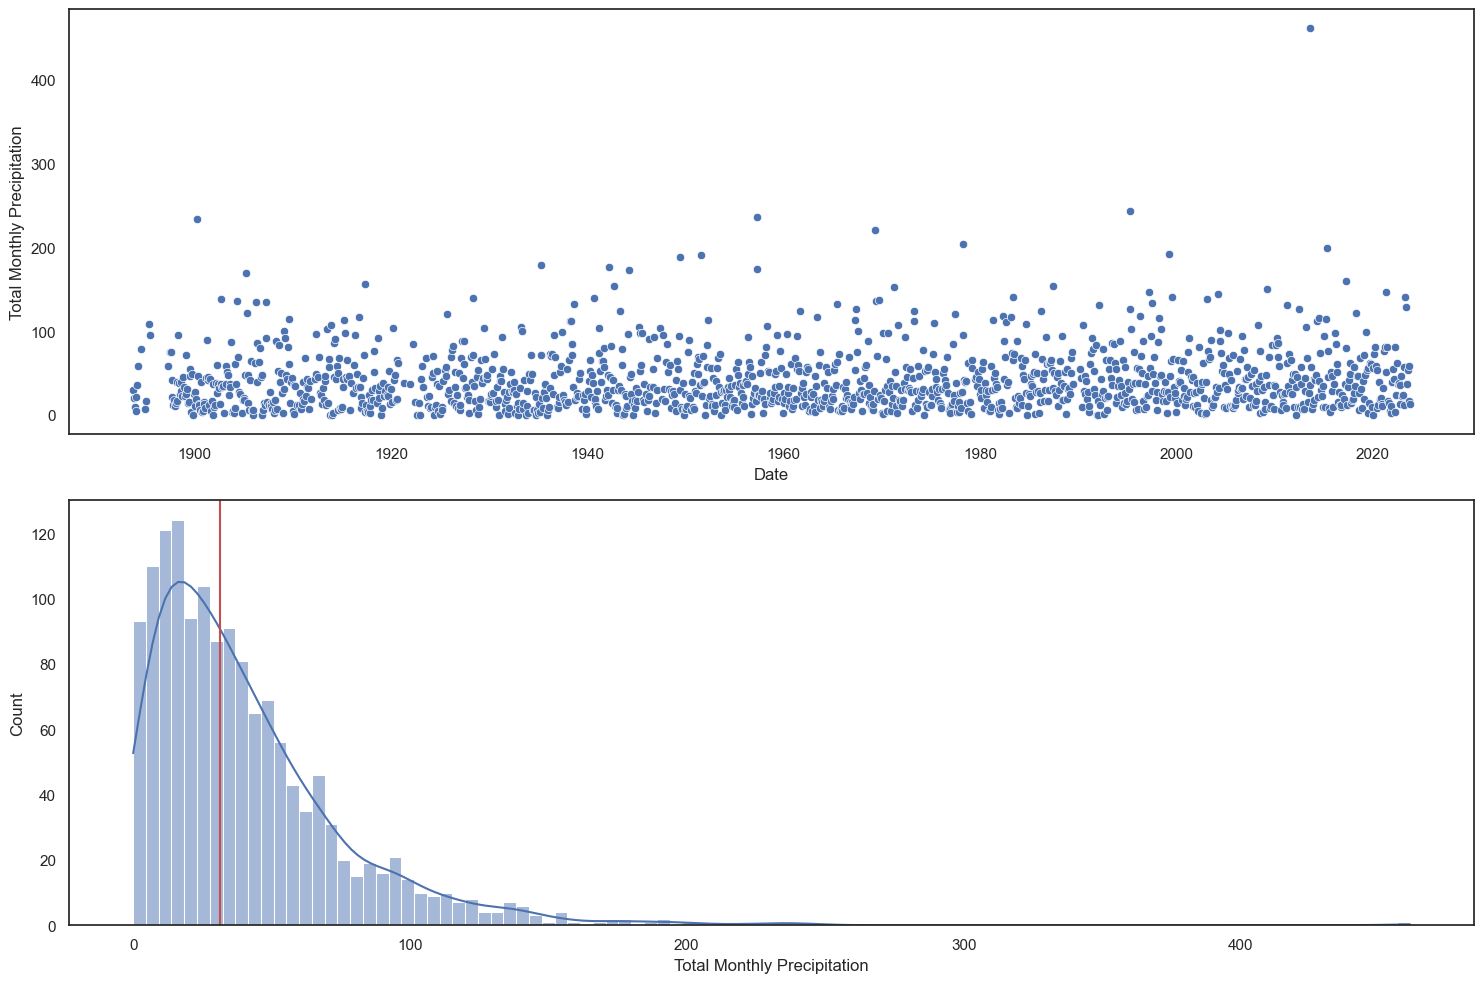

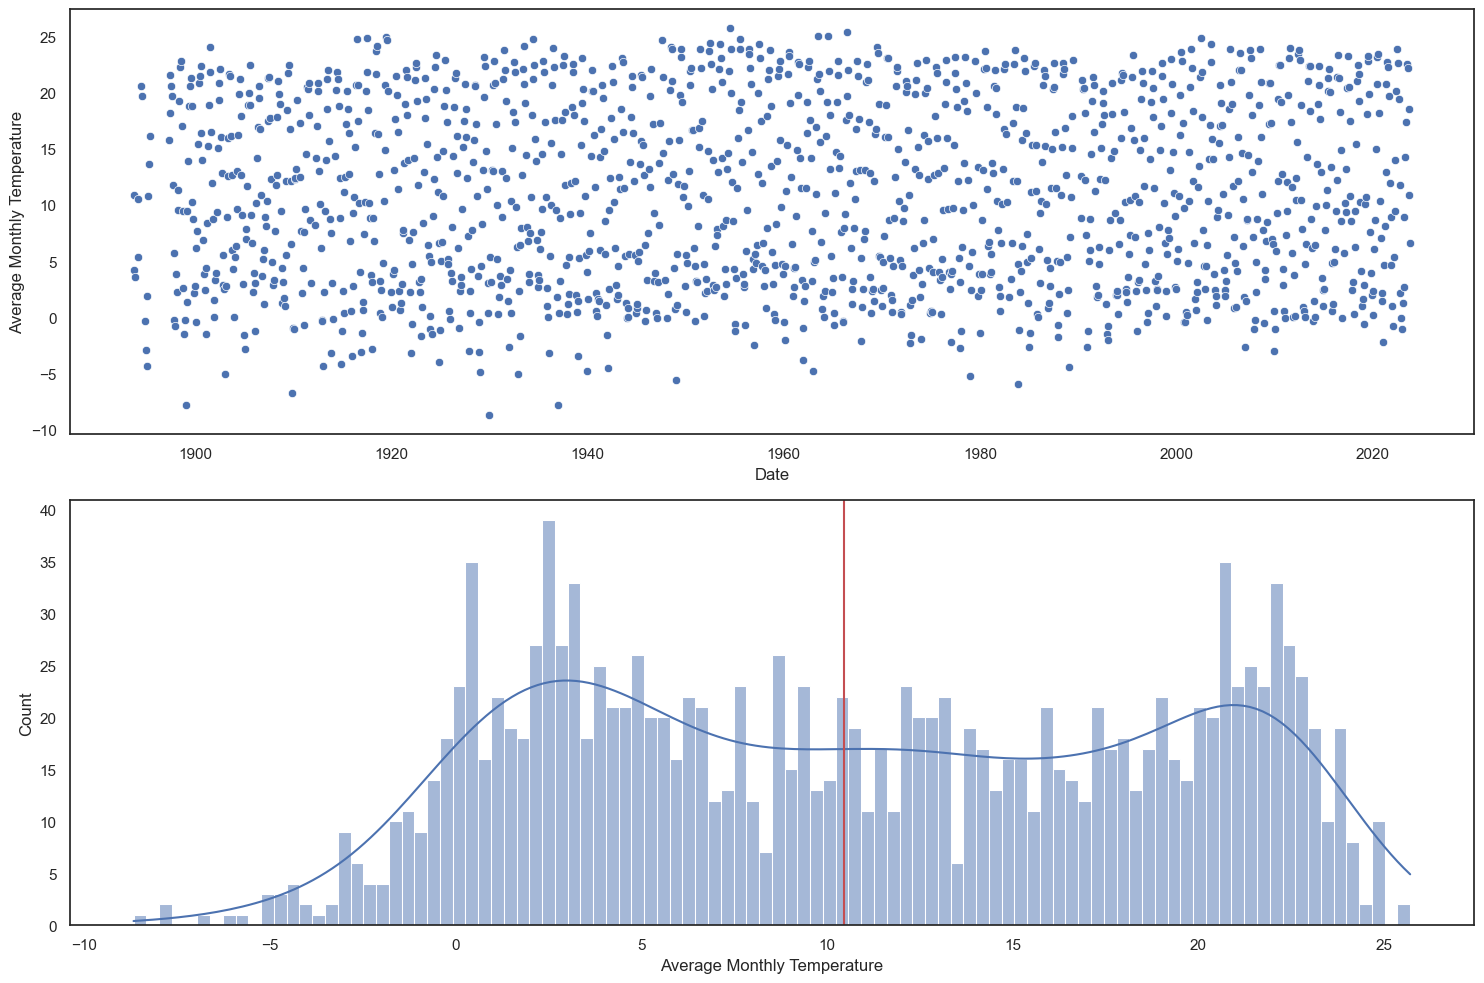

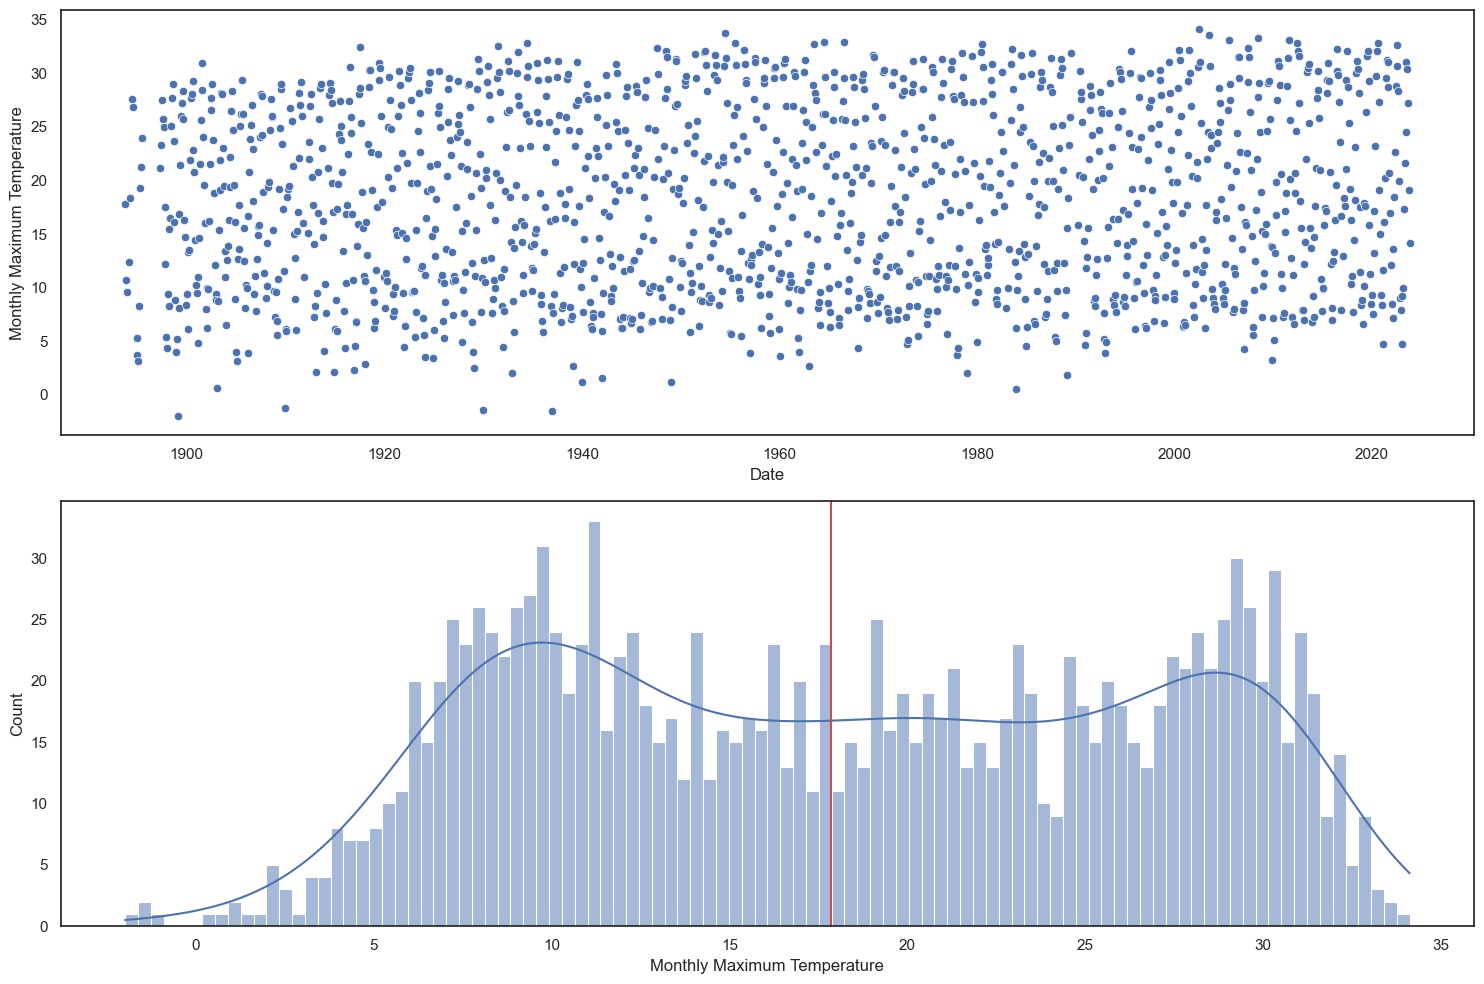

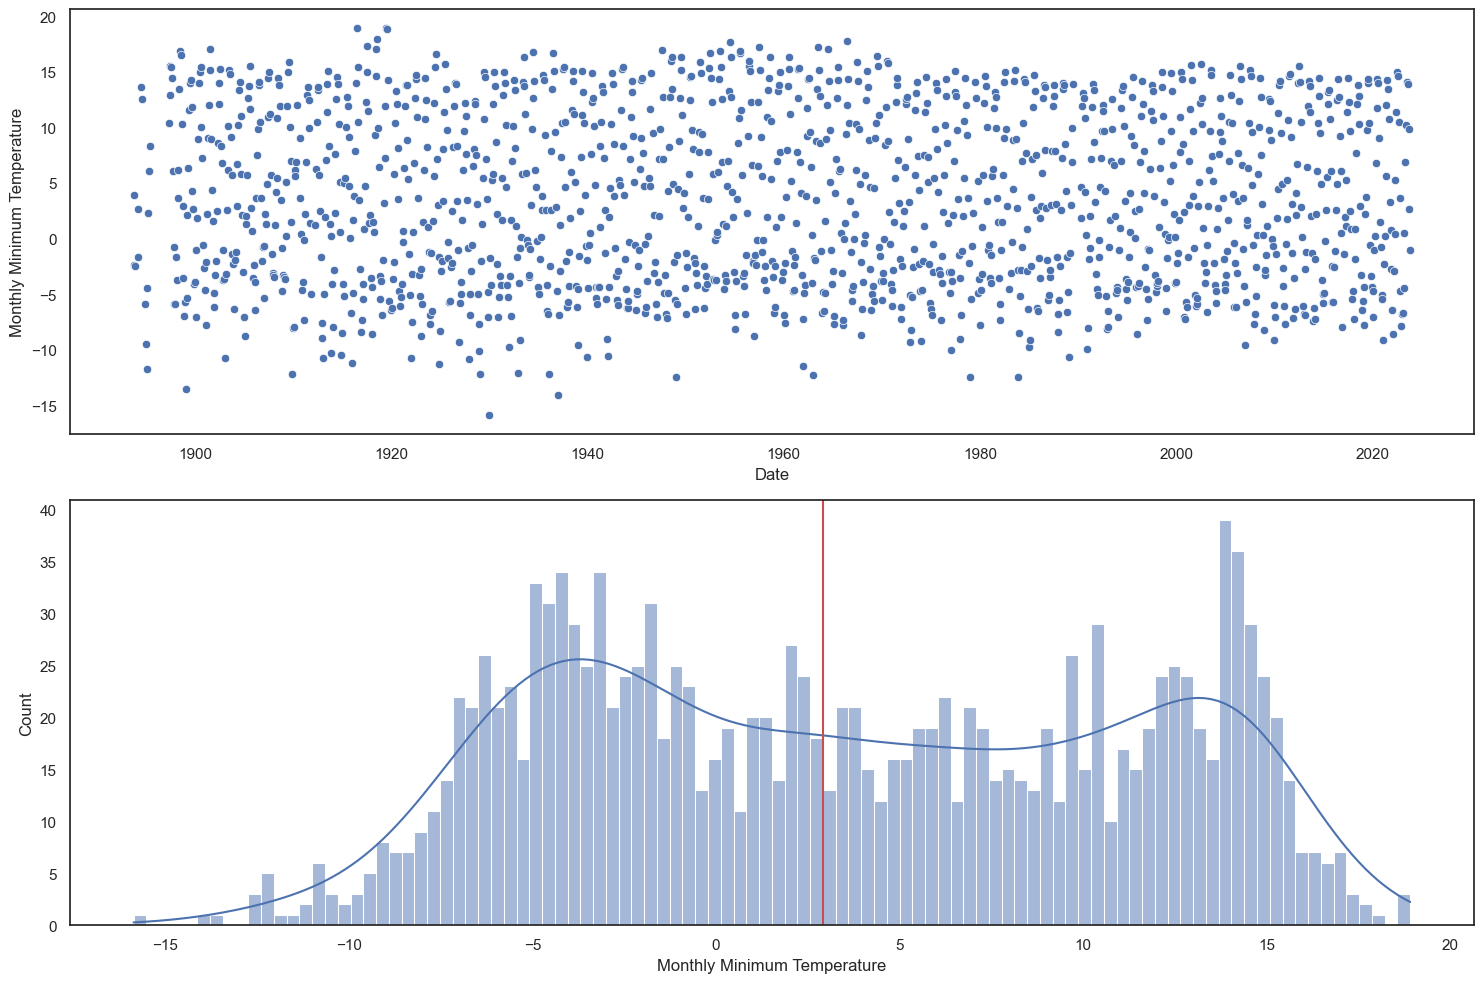

In [14]:
plot_climate(bou)

### Carbon emission analysis
___

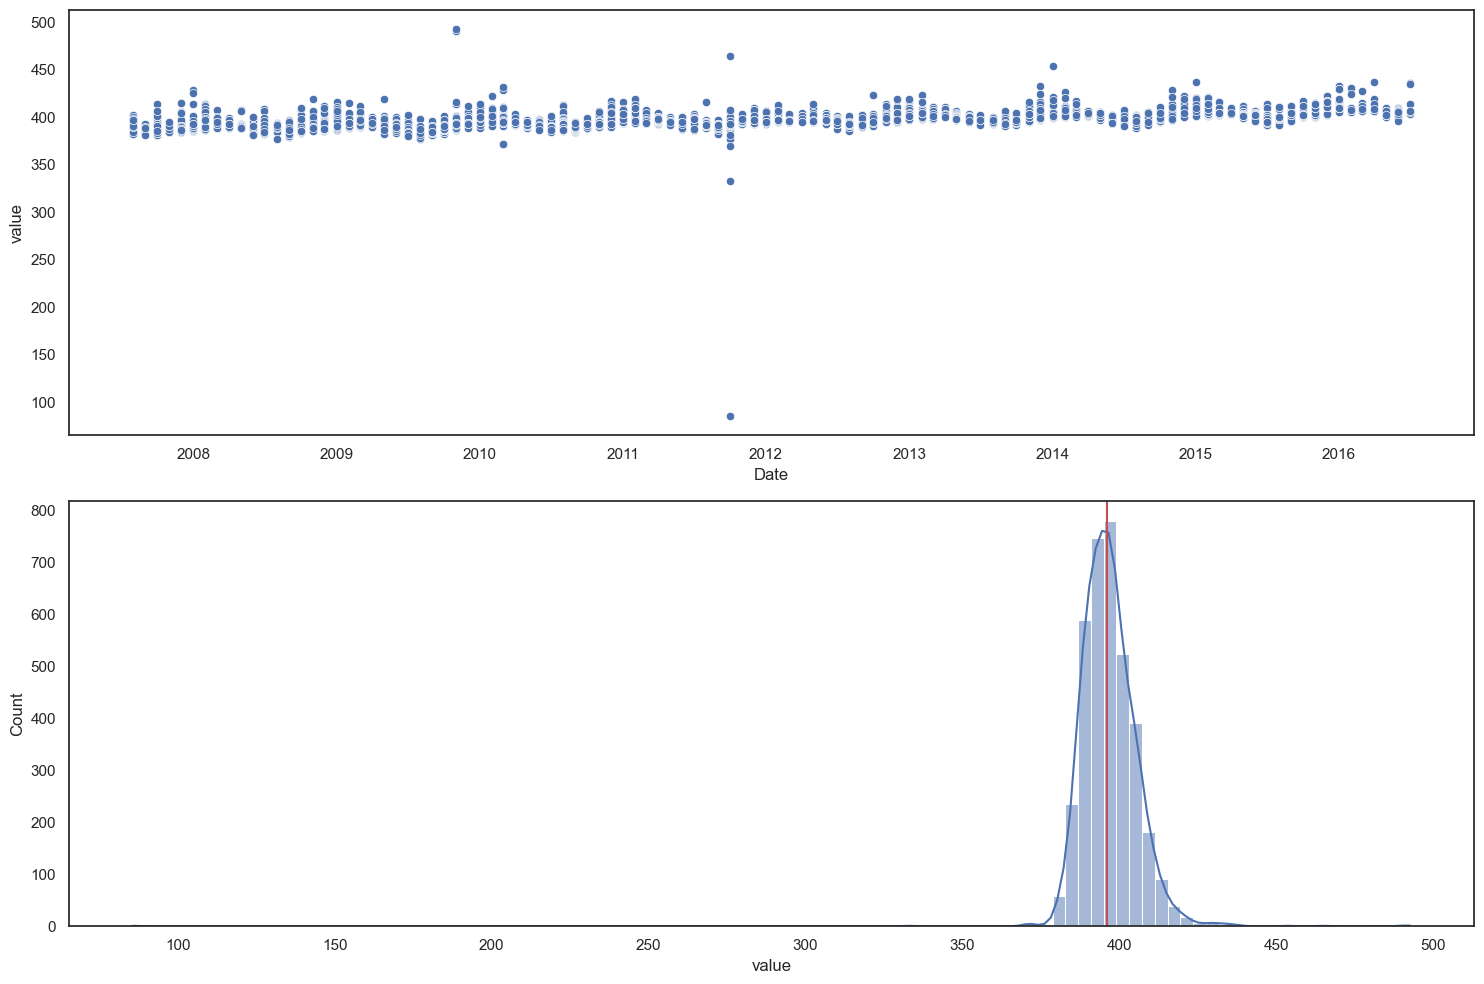

In [15]:
plot('value', df=bou_co2)

In [16]:
bou_co2 = outlier(bou_co2)
hil_co2 = outlier(hil_co2)
hoh_co2 = outlier(hoh_co2)
cap_co2 = outlier(cap_co2)
los_co2 = outlier(los_co2)
san_co2 = outlier(san_co2)
ice_co2 = outlier(ice_co2)
tem_co2 = outlier(tem_co2)

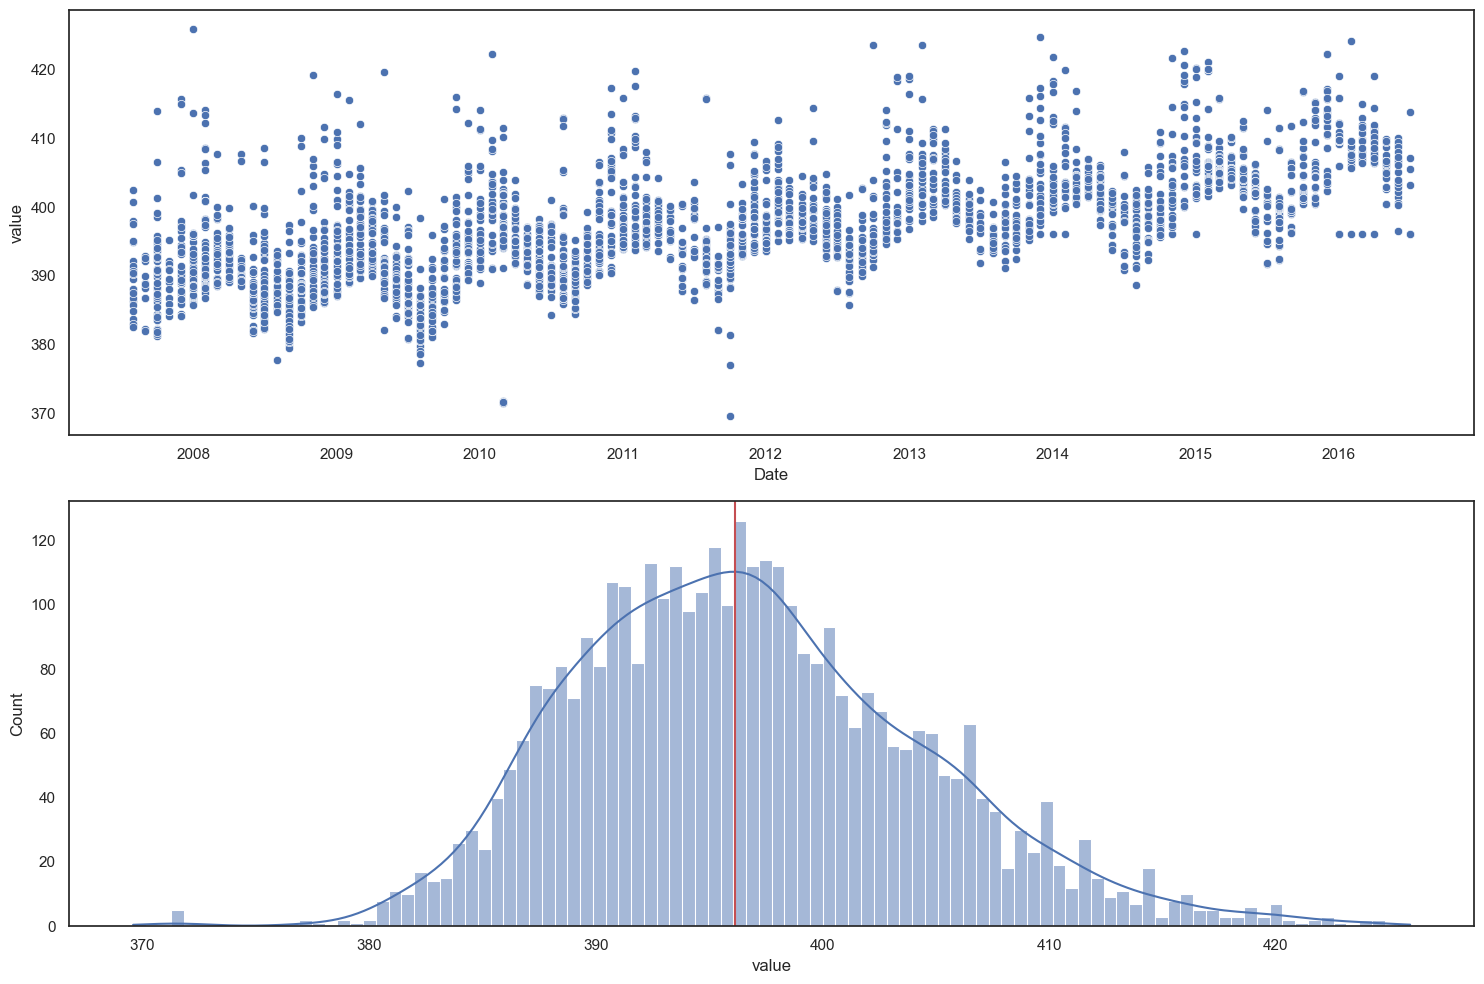

In [17]:
plot('value', df=bou_co2)

In [18]:
def boxplot(y_value, df, title):
    sns.set(rc={'figure.figsize':(15,8)})
    sns.set_style('white')
    sns.boxplot(data=df, x=df.index, y=y_value).set_title(title, fontsize=25)
    plt.ylabel('CO2 Emissions')
    plt.xticks(rotation=90)

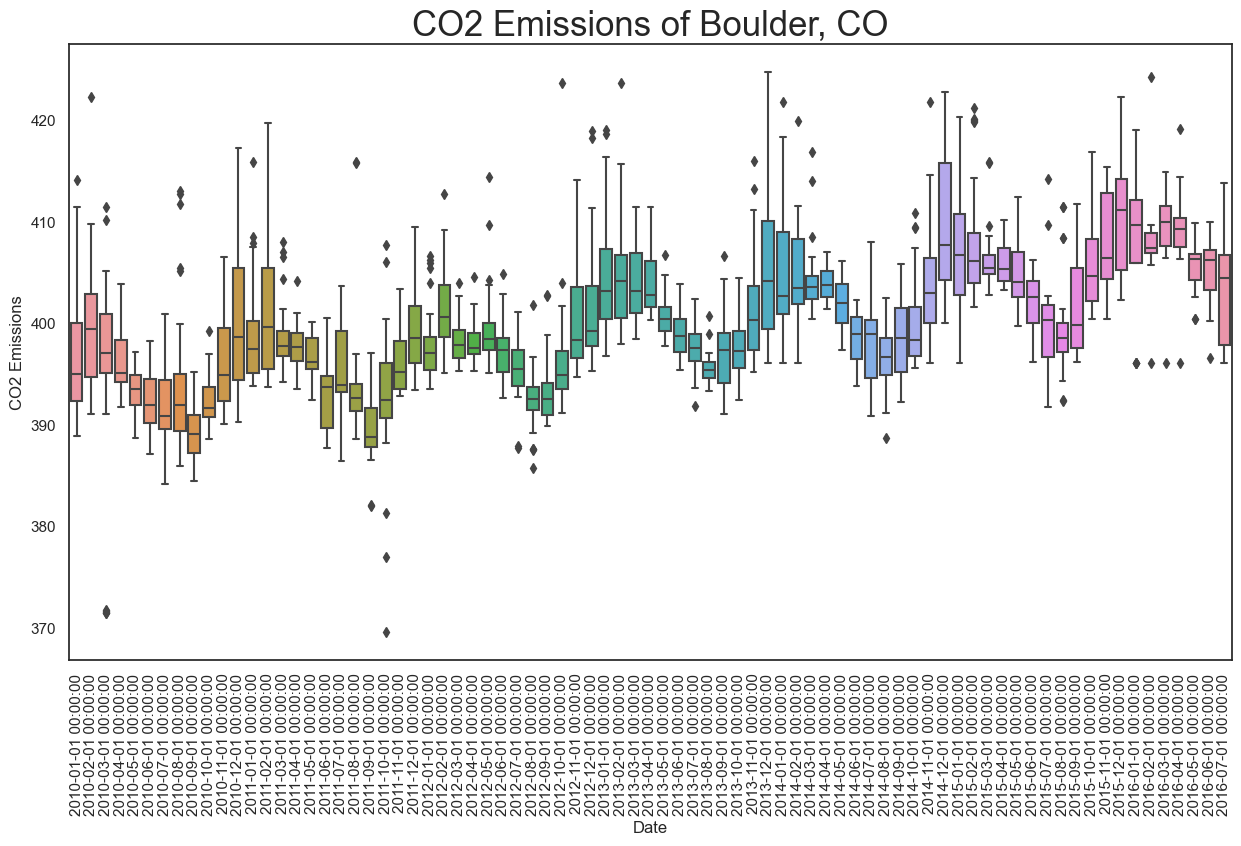

In [19]:
boxplot('value', bou_co2['2010-01-01':'2016-07-01'], title='CO2 Emissions of Boulder, CO')

In [20]:
print(
    'Z-score of CO2 values of Boulder:', Z_score(bou_co2['value']),
    '\nZ-score of CO2 values of Hilo International:', Z_score(hil_co2['value']),
    '\nZ-score of CO2 values of Hohpeissenberg:', Z_score(hoh_co2['value']),
    '\nZ-score of CO2 values of Cape Florida:', Z_score(cap_co2['value']),
    '\nZ-score of CO2 values of Los Angeles:', Z_score(los_co2['value']),
    '\nZ-score of CO2 values of San Francisco:', Z_score(san_co2['value']),
    '\nZ-score of CO2 values of Iceland:', Z_score(ice_co2['value']),
    '\nZ-score of CO2 values of Moody:', Z_score(tem_co2['value'])
)

Z-score of CO2 values of Boulder: 0.45401092981989977 
Z-score of CO2 values of Hilo International: 0.04159783110743228 
Z-score of CO2 values of Hohpeissenberg: 0.0174842904554509 
Z-score of CO2 values of Cape Florida: 0.35203225480999273 
Z-score of CO2 values of Los Angeles: 0.8773859977336342 
Z-score of CO2 values of San Francisco: 0.602934154867303 
Z-score of CO2 values of Iceland: 0.0690282779549077 
Z-score of CO2 values of Moody: 0.5415955742192688


Data is skewed more to the right.